In [33]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [82]:
# Folder where all your outlet CSVs are stored
data_folder = Path("../data/cleaned")
output_folder = Path("../results")
TOPIC_COL = "label"

dfs = []

for csv_path in data_folder.glob("*.csv"):
    outlet_name = csv_path.stem  # e.g. "AP", "CBC", "FoxNews" from "AP.csv"
    df = pd.read_csv(csv_path)
    
    if TOPIC_COL not in df.columns:
        print(f" Warning: '{TOPIC_COL}' column not found in {csv_path.name}")
    
    df["outlet"] = outlet_name

    dfs.append(df)


In [84]:
# Combine all outlets into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Rename the outlets from filename to media outlet name
rename_map = {
    "zelensky_ap_filtered": "Associated Press",
    "zelensky_cbc_filtered": "CBC News",
    "zelensky_ctv_filtered": "CTV News",
    "zelensky_foxnews_filtered": "Fox News",
    "zelensky_globalnews_filtered": "Global News",
    "zelensky_nbc_filtered": "NBC News",
    "zelensky_npr_filtered": "NPR",
    "zelensky_nytimes_filtered": "NY Times",
    "zelensky_wsj_filtered": "The Wall Street Journal News",
    "zelensky_wsjopinions_filtered": "The Wall Street Journal Opinions"
}

data["outlet"] = data["outlet"].replace(rename_map)

# Count articles per (topic, outlet)
topic_counts = (
    data
    .groupby(TOPIC_COL)
    .size()
    .reset_index(name="count")
)
topic_counts

,label,count
0,Aid Policies,96
1,Diplomatic Engagements,244
2,Domestic Governance,45
3,Economic Structure,6
4,Humanitarian Crisis,14
5,Media Representation,108
6,Military Operations,48
7,Russia-Related Rhetoric,136


In [86]:
topic_counts.to_csv(output_folder/f"topic.csv", index=False)

In [88]:
topic_outlet_counts = pd.crosstab(
    data["label"],    # rows = topics
    data["outlet"]    # columns = outlets
)

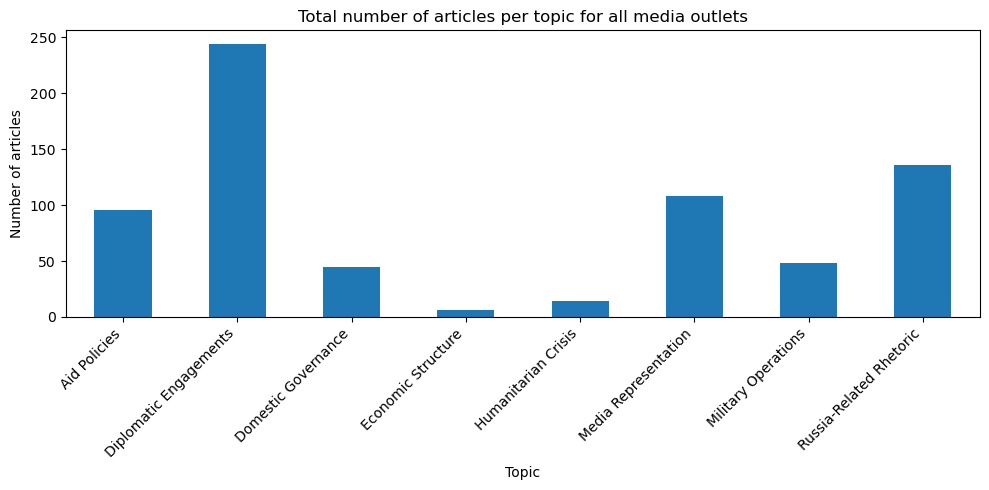

In [90]:
# Plot grouped bar chart
ax = topic_counts.plot(
    kind="bar",
    x=TOPIC_COL,
    y="count",
    legend=False,
    figsize=(10, 5)
)

ax.set_xlabel("Topic")
ax.set_ylabel("Number of articles")
ax.set_title("Total number of articles per topic for all media outlets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [94]:
fig = ax.get_figure()
fig.savefig(output_folder / f"label_counts_per_topic.png", dpi=300, bbox_inches="tight")

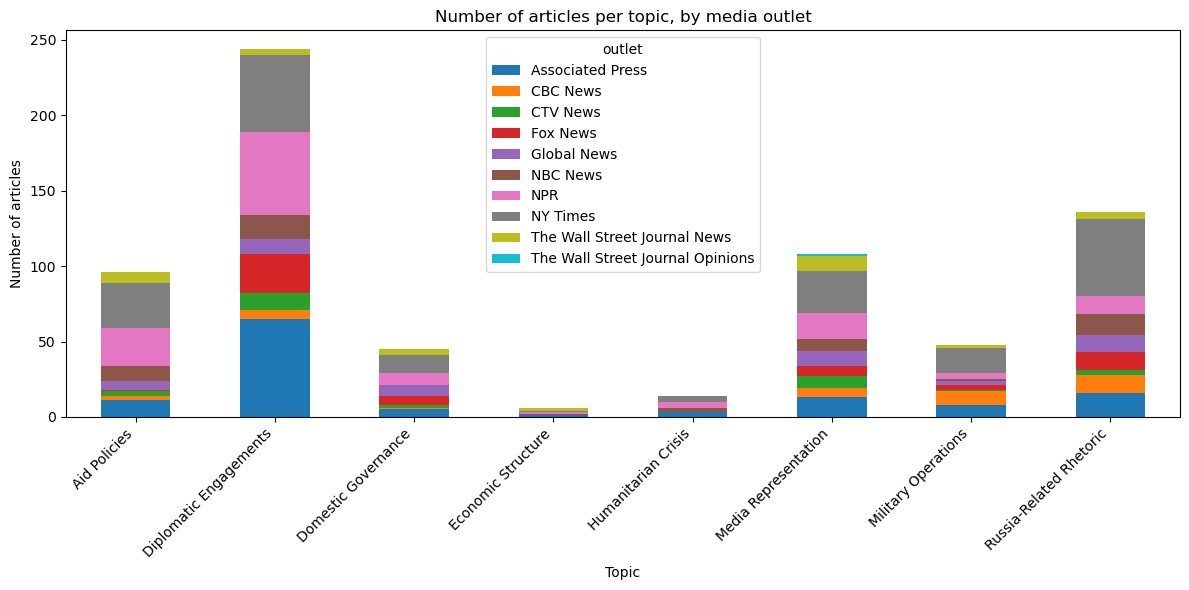

In [96]:
# Plot with separated bars for each topic
ax = topic_outlet_counts.plot(
    kind="bar",
    stacked=True,          # 🔑 this makes the “one band per topic” with contributions
    figsize=(12, 6)
)

ax.set_title("Number of articles per topic, by media outlet")
ax.set_xlabel("Topic")
ax.set_ylabel("Number of articles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()